In [ ]:
# project_name = "SeamTaping"
project_name = "WRB"

Add paths to the project directory and the directory containing utils

In [4]:
import sys
import os

# Add the path to the project directory
utils_path = os.path.abspath('..')
if utils_path not in sys.path:
    sys.path.append(utils_path)
# Add the path to the directory containing utils to sys.path
utils_path = os.path.abspath('../utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)
print(sys.path)

['c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\python312.zip', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\DLLs', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice', '', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\win32', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\Pythonwin', 'd:\\Work\\Crack-Detection', 'd:\\Work\\Crack-Detection\\utils']


## Update the XLSX dataset

Update the xlsx dataset so that it contains the image final URL and image file name.

In [5]:
import pandas as pd
from tqdm import tqdm
from utils.network_functions import get_final_url, get_image_name

# Initialize tqdm to monitor progress
tqdm.pandas()

# the dataset path
xlsx_dataset_name = f"{project_name}_All"
xlsx_dataset_path = '../dataset/' + xlsx_dataset_name + '.xlsx'

# Load the XLSX file
df = pd.read_excel(xlsx_dataset_path)

# Define a function to apply get_final_url and get_image_name with tqdm progress bar
def apply_functions(row):
    row['Image Final URL'] = get_final_url(row['2D Image URL'])
    row['Image File Name'] = get_image_name(row['Image Final URL'])
    return row

# Apply the function to each row using progress_apply from tqdm
df = df.progress_apply(apply_functions, axis=1)

# Save the updated DataFrame to a new XLSX file
updated_xlsx_dataset_path = '../dataset/' + xlsx_dataset_name + '_updated.xlsx'
df.to_excel(updated_xlsx_dataset_path, index=False)

print(f"Updated dataset saved to '{updated_xlsx_dataset_path}'.")


Updated dataset saved to '../dataset/WRB_All_updated.xlsx'.


### Check the updated XLSX dataset

Visualize random rows with polygon annotations.


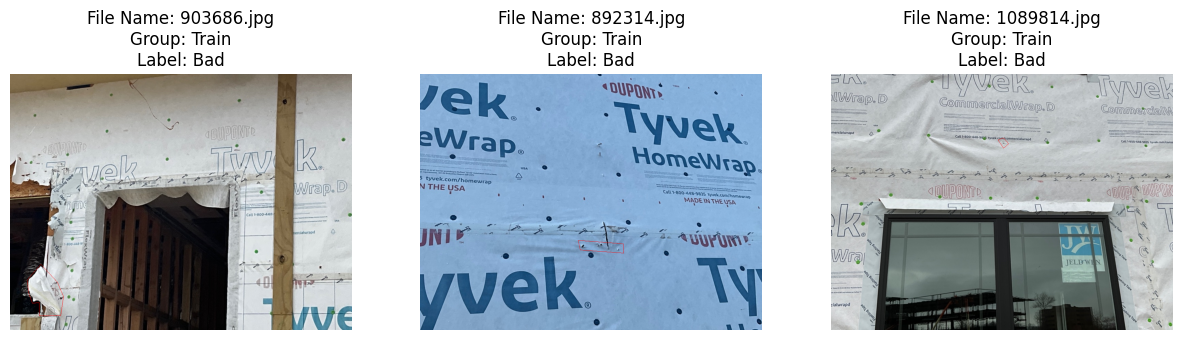

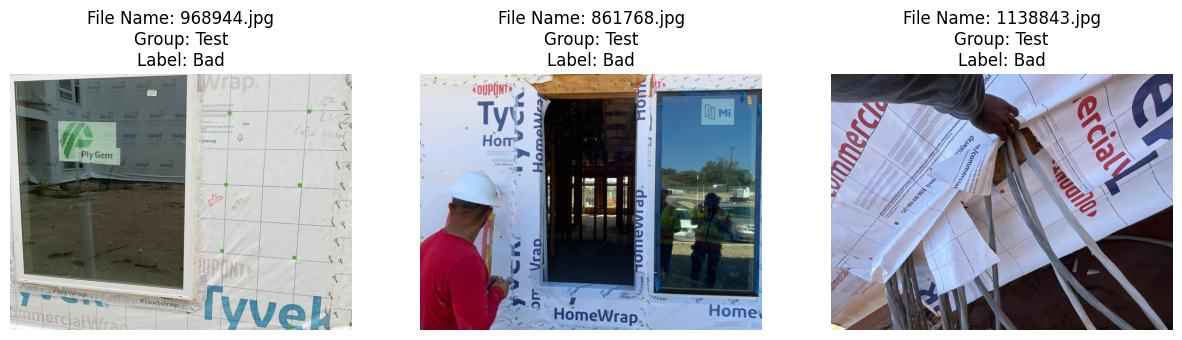

In [7]:
import pandas as pd
from utils.visualization_functions import visualize_random_rows_updated

# Read the dataset
data = pd.read_excel(updated_xlsx_dataset_path)

# Split the data into training and test sets based on the 'Group Name' column
train_data = data[data['Group Name'] == 'Train']
test_data = data[data['Group Name'] == 'Test']

# Visualize random images from the training and test set
visualize_random_rows_updated(train_data)
visualize_random_rows_updated(test_data)
